# Ford GoBike System Data
## by Muhammad Adel

## Dataset Overview


> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Virables include duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year and member_gender

In [169]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [170]:
bike_sys = pd.read_csv('2017-fordgobike-tripdata.csv')
bike_sys.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [171]:
bike_sys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [172]:
bike_sys.shape


(519700, 15)

### What is the structure of your dataset?

> The dataset is consist of 519700 rows and 15 columns

### What is/are the main feature(s) of interest in your dataset?

> member gender, duration_sec and user_type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> member gender, duration_sec and user_type

## Univariate Exploration


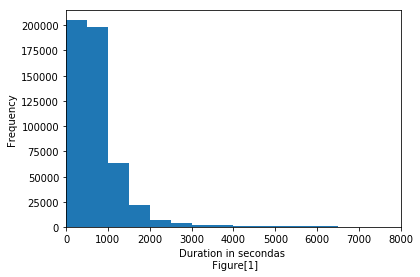

In [173]:
#base_color = sb.color_palette()[0]
#sb.countplot(data=bike_sys, x='member_gender', color=base_color, hue='duration_sec')
bin_edges = np.arange(0, bike_sys['duration_sec'].max()+500, 500)

plt.hist(data=bike_sys, x='duration_sec', bins=bin_edges);
plt.xlim([0, 8000])
plt.xlabel('Duration in secondas \n Figure[1]')
plt.ylabel('Frequency');

#### Alot of data not included so we will use log scale

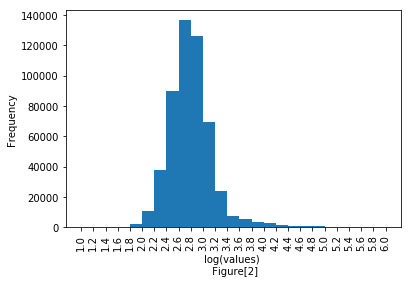

In [174]:
log_data = np.log10(bike_sys['duration_sec']) # direct data transform
log_bin_edges = np.arange(1, log_data.max()+1.2, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values) \n Figure[2]')
plt.xticks(np.arange(1, log_data.max()+1.2, 0.2), rotation=90);
plt.ylabel('Frequency');

#### after using log scale the data looks normally distrubuted 

duration_sec               519700
start_time                 519700
end_time                   519700
start_station_id           519700
start_station_name         519700
start_station_latitude     519700
start_station_longitude    519700
end_station_id             519700
end_station_name           519700
end_station_latitude       519700
end_station_longitude      519700
bike_id                    519700
user_type                  519700
member_birth_year          453159
member_gender              453238
dtype: int64

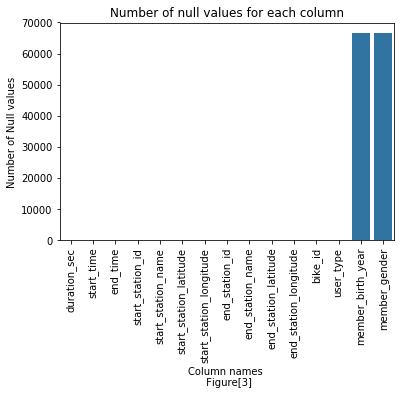

In [178]:
na_counts = bike_sys.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color);
plt.xticks(rotation=90);
plt.title('Number of null values for each column');
plt.ylabel('Number of Null values')
plt.xlabel('Column names \n Figure[3]');
(~bike_sys.isna()).sum()

- We have a lot of missing in member_birth_year and member_gender it seems that filling member_birth_year and member_gender is optional
- the non null records in member_birth_year and member_gender are 453159 record

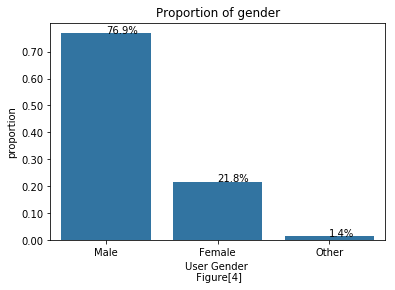

In [113]:
total_no = sum(~bike_sys.member_gender.isna()) # here we get the total number of users how fill gender
max_value = bike_sys.member_gender.value_counts()[0]
max_prop = max_value / total_no
yticks = np.arange(0, max_prop, 0.1)
ylabels = ['{:0.2f}'.format(v) for v in yticks]
plt.yticks(yticks * total_no, ylabels)
base_color = sb.color_palette()[0]
sb.countplot(data=bike_sys, x='member_gender', color=base_color)
plt.ylabel('proportion');
for i in range(len(bike_sys.member_gender.value_counts())):
    y = bike_sys.member_gender.value_counts()[i]
    pct_string = '{:0.1f}%'.format(100 * y / total_no)
    plt.text(i, y, pct_string)
plt.title('Proportion of gender');
plt.xlabel('User Gender \n Figure[4]');

- 76.9 % of our users which fill gender are male
- 21.8 % of our users which fill gender are Female
- 1.4 % of our users which fill gender are other

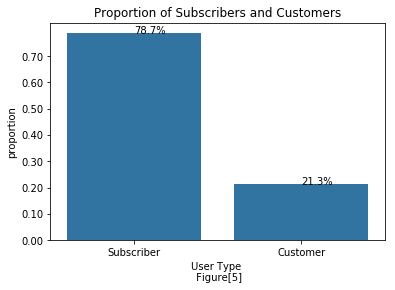

In [114]:
total_no = sum(~bike_sys.user_type.isna()) # here we get the total number of users how fill gender
max_value = bike_sys.user_type.value_counts()[0]
max_prop = max_value / total_no
yticks = np.arange(0, max_prop, 0.1)
ylabels = ['{:0.2f}'.format(v) for v in yticks]
plt.yticks(yticks * total_no, ylabels)
base_color = sb.color_palette()[0]
sb.countplot(data=bike_sys, x='user_type', color=base_color, order=bike_sys.user_type.value_counts().index)
plt.ylabel('proportion');
for i in range(len(bike_sys.user_type.value_counts())):
    y = bike_sys.user_type.value_counts()[i]
    pct_string = '{:0.1f}%'.format(100 * y / total_no)
    plt.text(i, y, pct_string)

plt.title('Proportion of Subscribers and Customers');
plt.xlabel('User Type \n Figure[5]');

- 78.7 % of our users are Subscribers
- 21.3 % of our users are customers 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> there are hunge numbers in `duration_sec` column so we used log transformation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No

## Bivariate Exploration



0.6784241305016928
0.3029034574740946
0.01867241202421258
1.0
0.7793638118876745
0.20731366640049642
0.013322521711829084
1.0


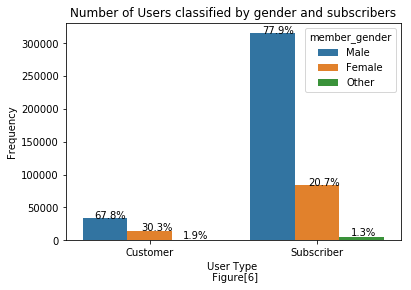

In [115]:
sb.countplot(data = bike_sys, x = 'user_type', hue = 'member_gender');
plt.title('Number of Users classified by gender and subscribers');
plt.ylabel('Frequency');
plt.xlabel('User Type \n Figure[6]');
prcentage_of_male_in_customer = len(bike_sys.query('user_type=="Customer" and member_gender=="Male"')) / len(bike_sys.query('user_type=="Customer" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
prcentage_of_Female_in_customer = len(bike_sys.query('user_type=="Customer" and member_gender=="Female"')) / len(bike_sys.query('user_type=="Customer" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
prcentage_of_Other_in_customer = len(bike_sys.query('user_type=="Customer" and member_gender=="Other"')) / len(bike_sys.query('user_type=="Customer" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
# here we check if our calculation is correct or not
print(prcentage_of_male_in_customer)
print(prcentage_of_Female_in_customer)
print(prcentage_of_Other_in_customer)
print(prcentage_of_male_in_customer + prcentage_of_Female_in_customer + prcentage_of_Other_in_customer)

prcentage_of_male_in_subscriber = len(bike_sys.query('user_type=="Subscriber" and member_gender=="Male"')) / len(bike_sys.query('user_type=="Subscriber" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
prcentage_of_Female_in_subscriber = len(bike_sys.query('user_type=="Subscriber" and member_gender=="Female"')) / len(bike_sys.query('user_type=="Subscriber" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
prcentage_of_Other_in_subscriber = len(bike_sys.query('user_type=="Subscriber" and member_gender=="Other"')) / len(bike_sys.query('user_type=="Subscriber" and (member_gender=="Male" or member_gender=="Female" or member_gender=="Other")'))
# here we check if our calculation is correct or not
print(prcentage_of_male_in_subscriber)
print(prcentage_of_Female_in_subscriber)
print(prcentage_of_Other_in_subscriber)
print(prcentage_of_male_in_subscriber + prcentage_of_Female_in_subscriber + prcentage_of_Other_in_subscriber)

plt.text(0 - 0.33, len(bike_sys.query('user_type=="Customer" and member_gender=="Male"')), '{:0.1f}%'.format(prcentage_of_male_in_customer * 100))
plt.text(0 - 0.05, len(bike_sys.query('user_type=="Customer" and member_gender=="Female"')), '{:0.1f}%'.format(prcentage_of_Female_in_customer * 100)) 
plt.text(0 + 0.2, len(bike_sys.query('user_type=="Cutomer" and member_gender=="Other"')) + 1900, '{:0.1f}%'.format(prcentage_of_Other_in_customer * 100)) 

plt.text(1 - 0.33, len(bike_sys.query('user_type=="Subscriber" and member_gender=="Male"')), '{:0.1f}%'.format(prcentage_of_male_in_subscriber * 100))
plt.text(1 - 0.05, len(bike_sys.query('user_type=="Subscriber" and member_gender=="Female"')), '{:0.1f}%'.format(prcentage_of_Female_in_subscriber * 100)) 
plt.text(1 + 0.2, len(bike_sys.query('user_type=="Subscriber" and member_gender=="Other"')) + 1900, '{:0.1f}%'.format(prcentage_of_Other_in_subscriber * 100));

- 67.8% form our Customers how fill their genders are Males, 30.3% are Female, and 1.9% are others
- 77.9% form our Subscribers how fill their genders are Males, 20.7% are Female, and 1.3% are others

Text(0, 0.5, 'Duration in Seconds')

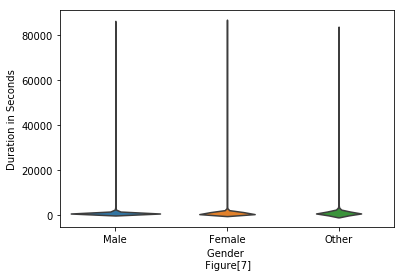

In [135]:
sb.violinplot(data=bike_sys, x='member_gender', y='duration_sec', inner=None)
plt.xlabel('Gender \n Figure[7]')
plt.ylabel('Duration in Seconds')

- It seems that all type of gender are close to each other in spending the same amount of duration with large number in males that females and large number of females that others but what in average?

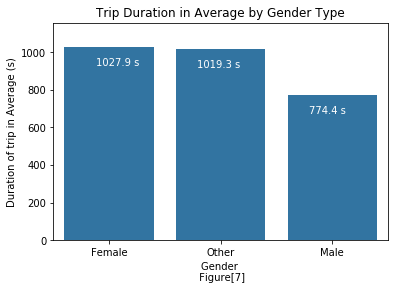

In [116]:
sb.barplot(data = bike_sys, x='member_gender', y='duration_sec', errwidth=0, color=sb.color_palette()[0], order=['Female', 'Other', 'Male']);
plt.xlabel('Gender \n Figure[8]')
plt.ylabel('Duration of trip in Average (s)');
plt.title('Trip Duration in Average by Gender Type');
# here we calculate the mean of duration for each gender
female_only = bike_sys.query('member_gender == "Female"')
male_only = bike_sys.query('member_gender == "Male"')
other_only = bike_sys.query('member_gender == "Other"')
mean_duration_of_female = female_only['duration_sec'].mean()
mean_duration_of_male = male_only['duration_sec'].mean()
mean_duration_of_other = other_only['duration_sec'].mean()
# check if our calcultions are correct or not
#print(mean_duration_of_female)
#print(mean_duration_of_male)
#print(mean_duration_of_other)
# below we wil write our precentage in bars
plt.text(0 - 0.12, mean_duration_of_female - 100,'{:0.1f} s'.format(mean_duration_of_female), color='white')
plt.text(1 - 0.21, mean_duration_of_other - 100,'{:0.1f} s'.format(mean_duration_of_other), color='white')
plt.text(2 - 0.21, mean_duration_of_male - 100,'{:0.1f} s'.format(mean_duration_of_male), color='white');

- in average form all users how submit their gender Females are the highest in trip durations in average  
- altough from all user how fill gender males are 76.9% but females spend more in average and males set in last place

Text(0, 0.5, 'Duration in Seconds')

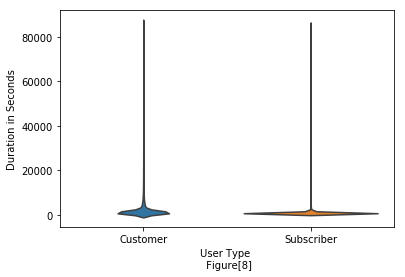

In [133]:
sb.violinplot(data=bike_sys, x='user_type', y='duration_sec', inner=None)
plt.xlabel('User Type \n Figure[9]')
plt.ylabel('Duration in Seconds')

- it seems that we duration was spend by customers and subscribers are the same with more subcribers but what about average duration ? 

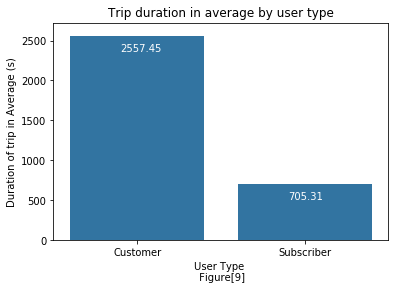

In [134]:
sb.barplot(data = bike_sys, x='user_type', y='duration_sec', errwidth=0, color=sb.color_palette()[0]);
plt.title('Trip duration in average by user type');
plt.xlabel('User Type \n Figure[10]')
plt.ylabel('Duration of trip in Average (s)');
mean_of_duration_of_customers = bike_sys.query('user_type=="Customer"')['duration_sec'].mean()# here we calculate mean duration in seconds of customers
mean_of_duration_of_Subscribers = bike_sys.query('user_type=="Subscriber"')['duration_sec'].mean() # here we calculate mean duration in seconds of subscribers
# we will check our means
#print(mean_of_duration_of_customers)
#print(mean_of_duration_of_Subscribers)
# then we will write values in bars
plt.text(0 - 0.1, mean_of_duration_of_customers - 200, '{:0.2f} s'.format(mean_of_duration_of_customers), color='white');
plt.text(1 - 0.1, mean_of_duration_of_Subscribers - 200, '{:0.2f} s'.format(mean_of_duration_of_Subscribers), color='white');

- altought 78.7% of our users are subscribers customers spend more time than our subscribers in average. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We saw that customers Spend more seconds in average than Subscribers
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> no

## Multivariate Exploration


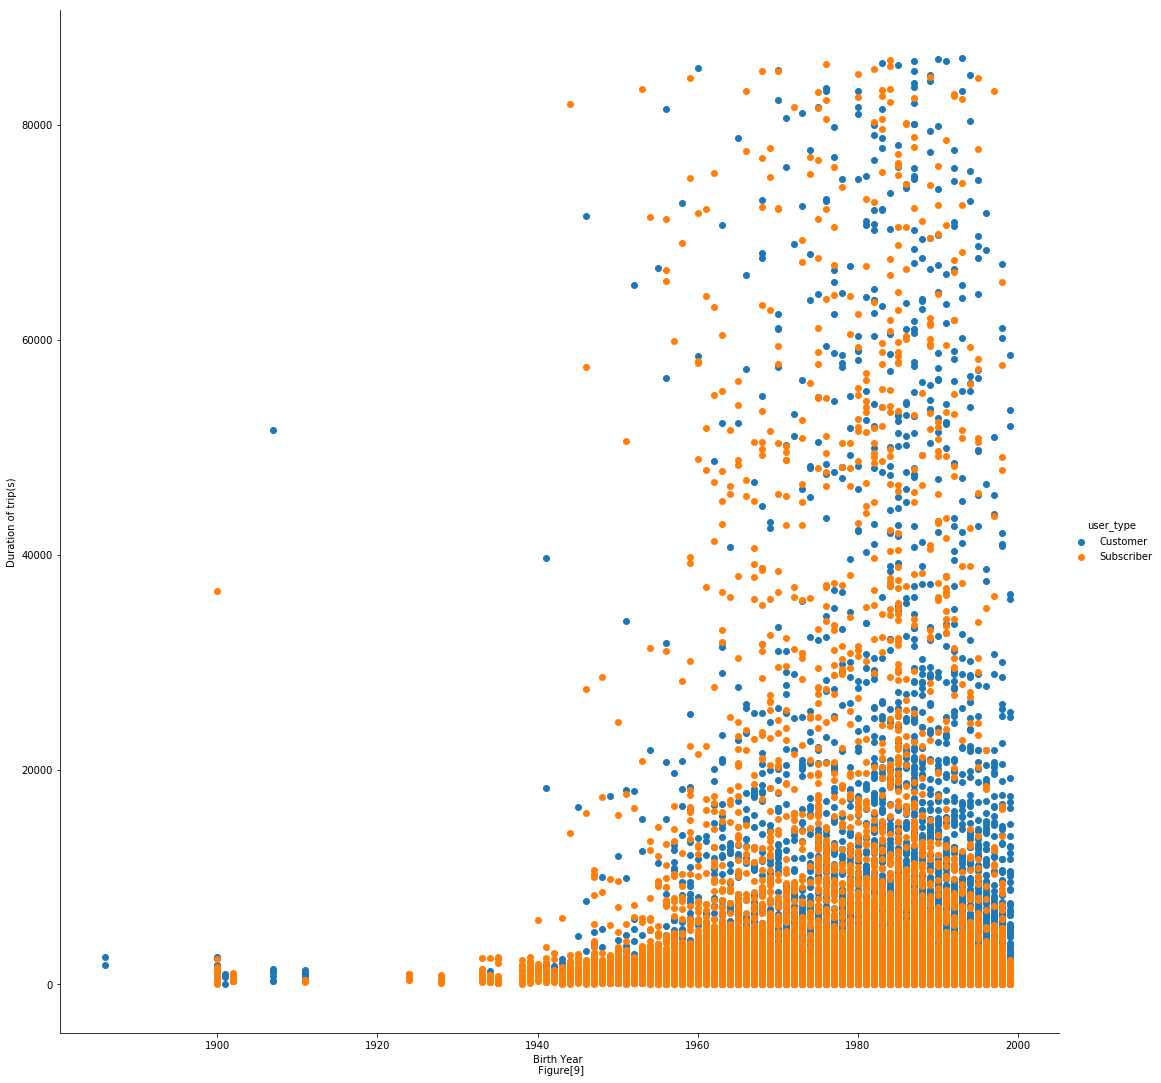

In [21]:
g = sb.FacetGrid(data = bike_sys, hue = 'user_type', height = 15)
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend();
plt.xlabel('Birth Year \n Figure[11]');
plt.ylabel('Duration of trip(s)');

- no clear reltaion 

Text(0.5, 21.706249999999983, 'Birth Year \n Figure[10]')

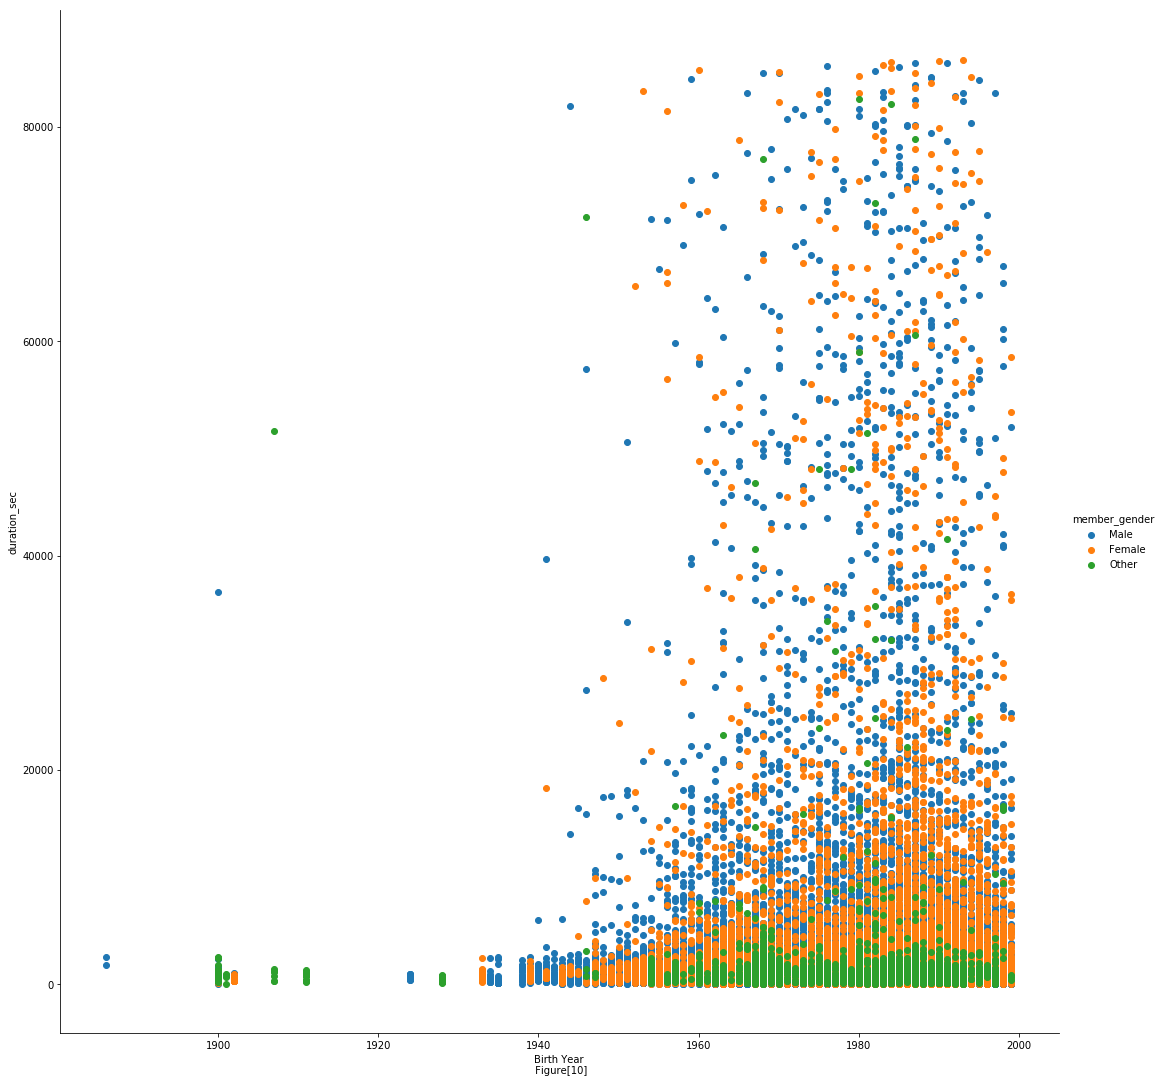

In [22]:
g = sb.FacetGrid(data = bike_sys, hue = 'member_gender', height = 15)
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend();
plt.xlabel('Birth Year \n Figure[12]');

- it seems there is no cleat relation between age, duration in seconds and member gender it seems it total they are equal 

Text(304.775, 0.5, 'Duration of trip in Average (s)')

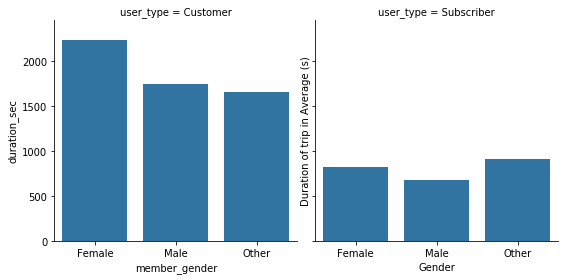

In [137]:
g = sb.FacetGrid(data = bike_sys, col = 'user_type', height = 4)
g.map(sb.barplot, 'member_gender', 'duration_sec', errwidth=0, order=['Female', 'Male', 'Other']);
plt.xlabel('Gender \n Figure[13]')
#plt.title('Duration of Trip By Gender')
plt.ylabel('Duration of trip in Average (s)');

- Here We can see Female, Male and other in Customer are spending more durtion in average that our Subsribers so we can say in total our customer spenders more duration in average that subscribers in all gender types

### I can't change the first plot y label, xlabel and title and I want to use them in explanatory step so I split the two plots by code

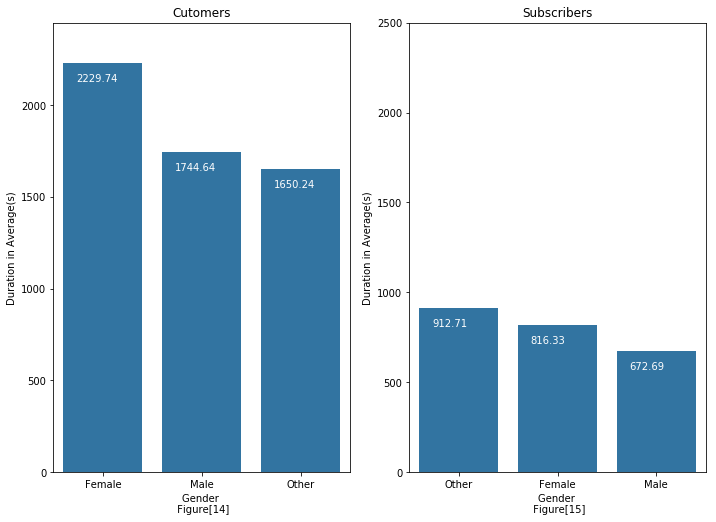

In [168]:
cutomers_only = bike_sys.query('user_type=="Customer"')
female_by_customer = bike_sys.query('user_type=="Customer" and member_gender=="Female"')
male_by_customer = bike_sys.query('user_type=="Customer" and member_gender=="Male"')
other_by_customer = bike_sys.query('user_type=="Customer" and member_gender=="Other"')
mean_female_by_customer = female_by_customer['duration_sec'].mean()
mean_male_by_customer = male_by_customer['duration_sec'].mean()
mean_other_by_customer = other_by_customer['duration_sec'].mean()

subscribers_only = bike_sys.query('user_type=="Subscriber"')
female_by_subscriber = bike_sys.query('user_type=="Subscriber" and member_gender=="Female"')
male_by_subsriber = bike_sys.query('user_type=="Subscriber" and member_gender=="Male"')
other_by_subscriber = bike_sys.query('user_type=="Subscriber" and member_gender=="Other"')
mean_female_by_subscriber = female_by_subscriber['duration_sec'].mean()
mean_male_by_subscriber = male_by_subsriber['duration_sec'].mean()
mean_other_by_subscriber = other_by_subscriber['duration_sec'].mean()


plt.figure(figsize=[ 11.69, 8.27])
plt.subplot(1,2,1)
yticks = np.arange(0, 2500 + 500, 500)
plt.yticks(yticks)
sb.barplot(data=cutomers_only, x='member_gender', y='duration_sec', errwidth=0, color=sb.color_palette()[0], order=['Female', 'Male', 'Other'])
plt.xlabel('Gender \n Figure[14]')
plt.ylabel('Duration in Average(s)')
plt.title('Cutomers');
plt.text(0 - 0.27,mean_female_by_customer - 100, '{:0.2f}'.format(mean_female_by_customer),color="white")
plt.text(1 - 0.27,mean_male_by_customer - 100, '{:0.2f}'.format(mean_male_by_customer), color="white")
plt.text(2 - 0.27,mean_other_by_customer - 100, '{:0.2f}'.format(mean_other_by_customer), color="white")
plt.subplot(1,2,2)
sb.barplot(data=subscribers_only, x='member_gender', y='duration_sec', errwidth=0, color=sb.color_palette()[0], order=['Other', 'Female', 'Male'])
plt.xlabel('Gender \n Figure[15]')
plt.ylabel('Duration in Average(s)')
plt.title('Subscribers');
yticks = np.arange(0, 2500 + 500, 500)
plt.yticks(yticks, yticks)
plt.text(0 - 0.27,mean_other_by_subscriber - 100, '{:0.2f}'.format(mean_other_by_subscriber), color="white")
plt.text(1 - 0.27,mean_female_by_subscriber - 100, '{:0.2f}'.format(mean_female_by_subscriber), color="white")
plt.text(2 - 0.27,mean_male_by_subscriber - 100, '{:0.2f}'.format(mean_male_by_subscriber), color="white");

- in cutomer type females spend in average about 2229.74 seconds, males about 1744.64 seconds and other about 1650.24 seconds
- in subscriber type other spend in average about 912.71 seconds, females about 816.33 seconds and males about 672.69 seconds

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Our customer who fill gender spend more time that our subscriber
### Were there any interesting or surprising interactions between features?

> Duration strongly related to user type and member gender.